In [206]:
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor

In [59]:
f=open("perch.dat","rb")
perch=pickle.load(f)
f.close()

In [60]:
length,weight=perch
length.shape,weight.shape

((56,), (56,))

In [61]:
length=length.reshape(-1,1)
weight=weight.reshape(-1,1)
length.shape,weight.shape

((56, 1), (56, 1))

In [62]:
train_input,test_input,train_target,test_target=train_test_split(length,weight)

model=KNeighborsRegressor(n_neighbors=3)
model.fit(train_input,train_target)
score=model.score(test_input,test_target)


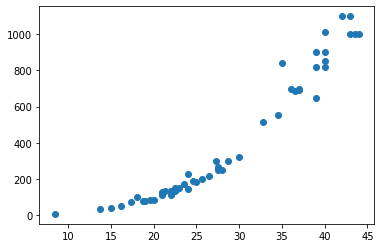

In [10]:
plt.scatter(length,weight)

In [11]:
model.predict([[60]])

array([[1000.]])

In [63]:
model=LinearRegression()
model.fit(train_input,train_target)
score=model.score(test_input,test_target)
model.intercept_

array([-629.25116917])

In [64]:
model.coef_

array([[36.2862243]])

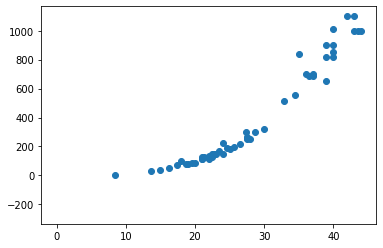

In [86]:
plt.scatter(length,weight)
plt.plot(model.coef_*range(10,46)+model.intercept_,color='red')

In [22]:
perch2=pd.read_csv("perch2.csv")
del perch2['Unnamed: 0']
perch2

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [53]:
data=np.array(perch2)

train_input,test_input,train_target,test_target=train_test_split(data,weight)

mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
train_scaled=(train_input-mean)/std
test_scaled=(test_input-mean)/std

model=LinearRegression()
model.fit(train_scaled,train_target)
print(model.score(test_scaled,test_target))


0.9288639692901386


In [54]:
model.coef_

array([[-22.18415114, 153.80717491, 194.19572425]])

In [55]:
model.intercept_

array([356.61666667])

In [116]:
fish2=pd.read_csv("fish2.csv")

data=fish2.iloc[:,1:].to_numpy()
target=fish2['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data,target)

ss=StandardScaler()
train_scaled=ss.fit_transform(train_input)
test_scaled=ss.transform(test_input)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled,train_target)
knn.score(test_scaled,test_target)

0.8

In [ ]:
np.round(knn.predict_proba(test_scaled),2)

In [121]:
lgr=LogisticRegression()
lgr.fit(train_scaled,train_target)
print(lgr.score(test_scaled,test_target))
print(lgr.classes_)
np.round(lgr.predict_proba(test_input),3)

0.8
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.978, 0.   , 0.   , 0.   , 0.021],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   ,

In [148]:
iris=load_iris()
data, target =iris['data'],iris['target']

train_input,test_input,train_target,test_target=train_test_split(data,target)

ss=StandardScaler()
train_scaled=ss.fit_transform(train_input)
test_scaled=ss.transform(test_input)

dt=DecisionTreeClassifier()
dt.fit(train_input,train_target)
dt.score(test_input,test_target)

0.9736842105263158

[Text(0.4444444444444444, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [38, 34, 40]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'petal width (cm) <= 1.75\ngini = 0.497\nsamples = 74\nvalue = [0, 34, 40]'),
 Text(0.4444444444444444, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.224\nsamples = 39\nvalue = [0, 34, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'petal length (cm) <= 5.45\ngini = 0.444\ns

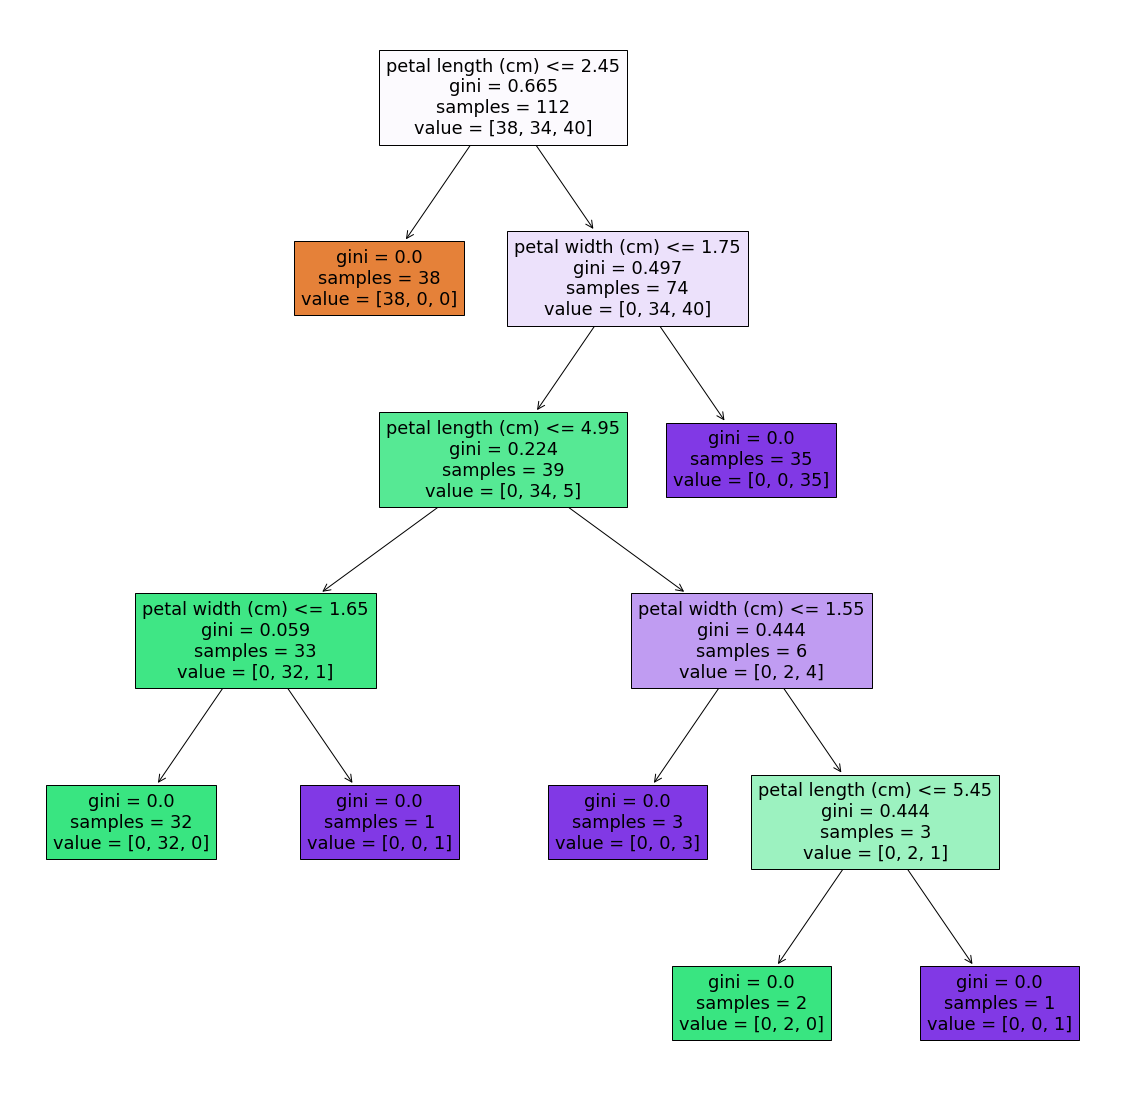

In [149]:
plt.figure(figsize=(20,20))
plot_tree(dt, feature_names=iris['feature_names'],filled=True)

In [150]:
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

1.0
0.9736842105263158


In [152]:
fish2

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [155]:
fish2=pd.read_csv("fish2.csv")
data=fish2.iloc[:,1:]
target=fish2['Species']
train_input,test_input,train_target,test_target=train_test_split(data,target)

In [157]:
for i in range(1,31):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(train_input,train_target)
    print("{}회차 시도 중".format(i))
    print("훈련 데이터 정확도 : {}".format(model.score(train_input,train_target)))
    print("시험 데이터 정확도 : {}".format(model.score(test_input,test_target)))

1회차 시도 중
훈련 데이터 정확도 : 0.5210084033613446
시험 데이터 정확도 : 0.575
2회차 시도 중
훈련 데이터 정확도 : 0.6050420168067226
시험 데이터 정확도 : 0.65
3회차 시도 중
훈련 데이터 정확도 : 0.680672268907563
시험 데이터 정확도 : 0.65
4회차 시도 중
훈련 데이터 정확도 : 0.680672268907563
시험 데이터 정확도 : 0.65
5회차 시도 중
훈련 데이터 정확도 : 0.7310924369747899
시험 데이터 정확도 : 0.7
6회차 시도 중
훈련 데이터 정확도 : 0.7899159663865546
시험 데이터 정확도 : 0.775
7회차 시도 중
훈련 데이터 정확도 : 0.8235294117647058
시험 데이터 정확도 : 0.775
8회차 시도 중
훈련 데이터 정확도 : 0.8907563025210085
시험 데이터 정확도 : 0.825
9회차 시도 중
훈련 데이터 정확도 : 0.9243697478991597
시험 데이터 정확도 : 0.825
10회차 시도 중
훈련 데이터 정확도 : 0.9747899159663865
시험 데이터 정확도 : 0.8
11회차 시도 중
훈련 데이터 정확도 : 0.9831932773109243
시험 데이터 정확도 : 0.825
12회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.8
13회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.825
14회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.825
15회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.8
16회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.85
17회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.825
18회차 시도 중
훈련 데이터 정확도 : 1.0
시험 데이터 정확도 : 0.775
19회차 시도 중
훈련 데이터 정확도 : 1.0
시험 

In [158]:
iris=load_iris()
data, target =iris['data'],iris['target']

In [160]:
rf=RandomForestClassifier()

rf=RandomForestClassifier(oob_score=True)
rf.fit(data,target)

RandomForestClassifier(oob_score=True)

In [163]:
rf.oob_score_

0.9533333333333334

In [233]:
user_agent={"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0)"}
url='https://finance.naver.com/item/sise_day.naver?code=005930&page={}'
total_tables=[]
for i in tqdm(range(1,669)):
    req=requests.get(url.format(i),headers=user_agent)
    html=BeautifulSoup(req.text)
    table_tag=html.find("table",class_="type2")
    table=pd.read_html(str(table_tag))[0]
    table=table.dropna()
    total_tables.append(table)
    time.sleep(0.7)

100%|██████████| 668/668 [12:34<00:00,  1.13s/it]


In [235]:
samsung=pd.concat(total_tables,ignore_index=True)
samsung=samsung.drop(0)
samsung['날짜']=pd.to_datetime(samsung['날짜'],format="%Y.%m.%d")
samsung=samsung.sort_values(by='날짜')
samsung=samsung.reset_index(drop=True)
del samsung['전일비']

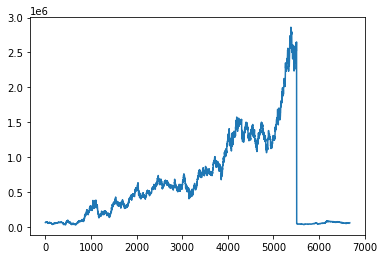

In [236]:
plt.plot(samsung['종가'])

In [237]:
train=samsung[samsung['날짜'].dt.year<=2021]
test=samsung[samsung['날짜'].dt.year>2021]

train_input=[]
train_target=[]

test_input=[]
test_target=[]

#데이터를 주는 방식 : 전날의 종가, 시가, 고가, 저가, 거래량을 x값, 다음날의 종가를 y값으로 주어 학습시킴.

for i in range(len(train)-1): #target 데이터를 주는 방식이 다음 index의 종가를 주는 방식이기 때문에 
    x=list(train.iloc[i,1:])
    y=train.iloc[i+1,1]
    train_input.append(x)
    train_target.append(y)

for i in range(len(test)-1):
    x=list(test.iloc[i,1:])
    y=test.iloc[i+1,1]
    test_input.append(x)
    test_target.append(y)

In [238]:
train_input=np.array(train_input)
train_target=np.array(train_target)
test_input=np.array(test_input)
test_target=np.array(test_target)

[78700. 77400. 76900. 78300. 78000. 78900. 78900. 77900. 77300. 77500.
 77000. 76300. 76500. 75600. 75100. 74000. 73300. 71300. 73300. 73300.
 74000. 73000. 73500. 74700. 75400. 74900. 73700. 73700. 74800. 75000.
 74300. 74200. 73400. 73000. 71500. 71900. 72100. 71700. 72900. 71500.
 70100. 69500. 71200. 70000. 70200. 69500. 70400. 71200. 70700. 69900.
 70300. 70500. 69800. 69800. 69700. 70200. 69900. 69600. 69100. 69300.
 69200. 68500. 68000. 67800. 67900. 67000. 68700. 67500. 66600. 66700.
 67300. 67400. 67700. 67000. 66300. 66100. 65000. 64800. 67400. 67300.
 67500. 67900. 66500. 66100. 65700. 65700. 64900. 66500. 66300. 67600.
 68100. 67500. 68000. 67900. 66500. 66400. 65900. 66500. 67700. 67400.
 66700. 66800. 65500. 65300. 65200. 63800. 62100. 61900. 60700. 60900.
 59800. 58700. 58500. 57600. 57400. 58400. 58800. 59400. 58000. 57000.
 56200. 57100. 57200. 56400. 58200. 58700. 58800. 58100. 58000. 57500.
 60000. 61900. 60900. 60500. 61800. 61300. 61100. 61700. 61800. 61900.
 61400

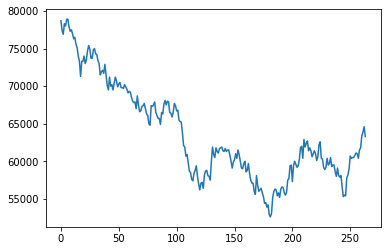

In [239]:
plt.plot(test_target)
print(test_target)

In [240]:
rf=RandomForestRegressor()
rf.fit(train_input,train_target)

RandomForestRegressor()

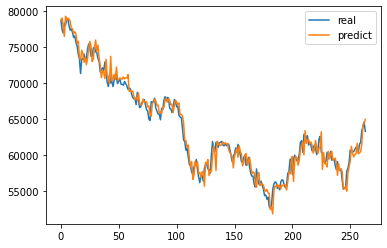

In [241]:
plt.plot(test_target)
plt.plot(rf.predict(test_input))
plt.legend(['real','predict'])

In [247]:
samsung.iloc[-1,1:]

종가        63300.0
시가        64900.0
고가        64900.0
저가        63100.0
거래량    20995234.0
Name: 6674, dtype: object